In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

import keras
import tensorflow

In [2]:
print(tensorflow.__version__)
print(keras.__version__)

2.5.0
2.5.0


# 📚 1. Keras 기반의 Regeression

## 📚 1.1. 직선의 방정식

In [3]:
# w = 2.1 ,   b = 0.13
X = np.array([[1],
              [2], 
              [3]])
y = np.array([[2.2], [4.4], [6.4]])

In [4]:
model = Sequential()   # 출력값을 다층의 입력으로 넣어줌
model.add(  Dense(1)     )   # 출력층 추가
model.compile(loss='mse',  optimizer='sgd' )    # 최적화 방법 설정,  loss 함수,  경사하강법(gd)

In [5]:
model.fit(X, y, epochs=10)

Epoch 1/10
1/1 [==============================] - 20s 20s/step - loss: 4.4733
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 3.5379
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 2.7985
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 2.2140
Epoch 5/10
1/1 [==============================] - 0s 5ms/step - loss: 1.7520
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.3869
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0982
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.8700
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6896
Epoch 10/10
1/1 [==============================] - 0s 7ms/step - loss: 0.5471


In [6]:
w = model.layers[0].get_weights()[0]
b = model.layers[0].get_weights()[1]
w, b

(array([[1.7487491]], dtype=float32), array([0.24433877], dtype=float32))

In [7]:
model.predict(X)   # y = wx + b
# sample이 3개라 출력값도 3개임.

array([[1.9930879],
       [3.741837 ],
       [5.4905863]], dtype=float32)

In [8]:
model.fit(X, y, epochs=1000, verbose=0)

In [9]:
print(model.layers[0].get_weights())
print(model.predict(X))

[array([[2.0911822]], dtype=float32), array([0.15337831], dtype=float32)]
[[2.2445605]
 [4.335743 ]
 [6.426925 ]]


In [10]:
# 일단 모델 초기화
model = Sequential() # 출력값을 다층의 입력으로 넣어줌
model.add( Dense(1) ) # 출력층 추가
model.compile( loss='mse', optimizer ='sgd' ) 
# 얼마나 돌려야 할지 모르니까 
hist = model.fit(X,y, epochs = 10000, verbose=0)

10000 [1.5877265930175781, 1.2556753158569336, 0.993206262588501, 0.7857372760772705, 0.621743381023407, 0.49211373925209045, 0.38964757323265076, 0.30865252017974854, 0.24462954699993134, 0.19402171671390533, 0.15401799976825714, 0.12239652872085571, 0.09740044921636581, 0.07764128595590591, 0.06202210113406181, 0.04967501759529114, 0.039914339780807495, 0.0321982204914093, 0.02609812654554844, 0.02127552218735218, 0.017462506890296936, 0.014447793364524841, 0.012063927948474884, 0.01017869170755148, 0.008687704801559448, 0.0075082904659211636, 0.006575209554284811, 0.005836853291839361, 0.005252322647720575, 0.004789486527442932, 0.004422791767865419, 0.004132132511585951, 0.0039015815127640963, 0.0037185053806751966, 0.003572969464585185, 0.003457160433754325, 0.0033647960517555475, 0.003290996653959155, 0.0032318737357854843, 0.0031843206379562616, 0.0031459499150514603, 0.003114840015769005, 0.0030894845258444548, 0.0030686536338180304, 0.0030514069367200136, 0.0030370268505066633

array([[2.2333434],
       [4.333334 ],
       [6.433324 ]], dtype=float32)

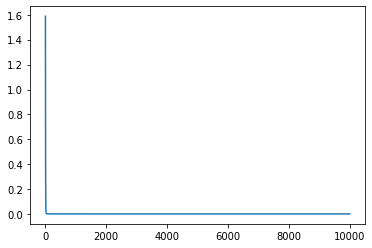

In [11]:
loss = hist.history['loss']
print(len(loss), loss)
plt.plot(loss)
model.predict(X)  # y = np.array([[2.2], [4.4], [6.4]])

In [12]:
print(model.layers[0].get_weights())

[array([[2.0999904]], dtype=float32), array([0.133353], dtype=float32)]


이제 좀 비슷해 졌죠잉? # w = 2.1 ,   b = 0.13    

---

In [13]:
model = Sequential() 
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='mse',  optimizer = mysgd) 


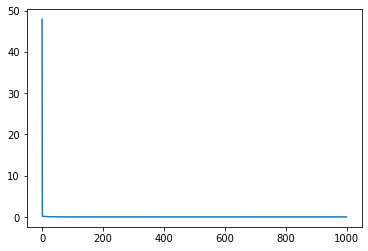

In [14]:
hist = model.fit(X, y, epochs=1000, verbose=0)
plt.plot(hist.history['loss'])

In [15]:
model.predict(X)

array([[2.2333338],
       [4.3333335],
       [6.433333 ]], dtype=float32)

---
## 📚 1.2. 주가 모델링

In [31]:
Interest_Rate =  np.array([2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,
                      2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75 , 1.75])
Unemployment_Rate = np.array([5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,
                         5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2 , 6.1])
Stock_Index_Price = np.array([1464,1394,1357,1293,1256,1254,
                         1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719])

n = Interest_Rate.size # 이자율 수
X = np.ones((n, 2))
X[:, 0] = Unemployment_Rate 
X[:, 1] = Interest_Rate
X = X /7
y = Stock_Index_Price.reshape(-1, 1) / 2000

In [32]:
model = Sequential() 

model.add(  Dense(1)     ) 

mysgd = optimizers.SGD(learning_rate=0.1)

model.compile(loss='mse',  optimizer=mysgd ) 
hist = model.fit(X, y, epochs=10000, verbose=0)

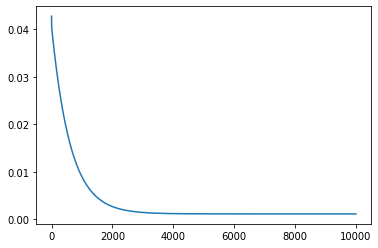

In [33]:
plt.plot(hist.history['loss'])

In [34]:
model.layers[0].get_weights()[0]

array([[-0.65590566],
       [ 1.4117991 ]], dtype=float32)

In [35]:
# 주가 예측, 실업률 5.3, 이자율 3.1 # y = w1*x1 + w2*x2 + b
x_ = np.array([[5.3, 3.1]]) / 7 # 학습, 예측 스케일이 같은 스케일이 됨.
model.predict(x_) * 2000 # predict =>  y = w1*x1 + w2*x2 + b # *2000 하는 이유는 실제 주가

array([[1573.3446]], dtype=float32)

In [36]:
model.summary() # w 2개, b  1개

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [43]:
model = Sequential() 
model.add(  Dense(5, input_shape=(4,)   )     ) 
model.add(  Dense(4)     ) 
model.add(  Dense(10)     ) 
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 25        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                50        
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


---
---
# 📚 3. 다층 비선형 신경망

In [48]:
X = np.array([[1],
             [2],
             [3],
             [4],
             [5]]) / 5
y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1]]) # 선형으로 모델링 하면 에러 발생.


model = Sequential()  # 순차적으로 레이어층을 더해주는 모델
model.add(  Dense(1)     ) 
mysgd = optimizers.SGD(learning_rate=0.1) # 확률적 경사하강법 # python code = weight[i] += - learning_rate * gradient
model.compile(loss='mse',  optimizer = mysgd)  # 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택
# loss : 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
# optimizer : 훈련 과정을 설정하는 옵티마이저를 설정합니다.
model.fit(X, y, epochs=1000, verbose=0)
# 모델이 오차로부터 매개 변수를 업데이트 시키는 과정을 학습, 훈련, 또는 적합(fitting)

# 첫번째 인자 = 훈련 데이터에 해당됩니다.
# 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
# epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
# batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

# verbose = 학습 중 출력되는 문구를 설정합니다.
# - 0 : 아무 것도 출력하지 않습니다.
# - 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
# - 2 : 미니 배치마다 손실 정보를 출력합니다.

model.predict(X)
# predict() : 임의의 입력에 대한 모델의 출력값을 확인합니다.
# 첫번째 인자 = 예측하고자 하는 데이터.
# batch_size = 배치 크기.

array([[3.3400075],
       [4.050004 ],
       [4.76     ],
       [5.469997 ],
       [6.1799936]], dtype=float32)

In [ ]:
## 책 내용
# 6. 모델의 저장(Save)과 로드(Load)
# 복습을 위한 스터디나 실제 어플리케이션 개발 단계에서 구현한 모델을 저장하고 불러오는 일은 중요합니다. 모델을 저장한다는 것은 학습이 끝난 신경망의 구조를 보존하고 계속해서 사용할 수 있다는 의미입니다.

# save() : 인공 신경망 모델을 hdf5 파일에 저장합니다.
model.save("model_name.h5")
# load_model() : 저장해둔 모델을 불러옵니다.
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")



array([[2.2000046],
       [4.4000244],
       [6.399865 ],
       [5.700206 ],
       [5.099895 ]], dtype=float32)

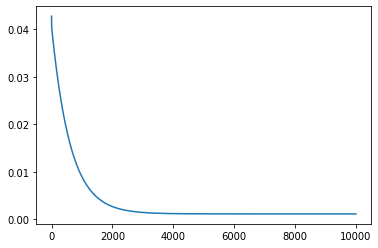

In [50]:
model = Sequential() 
model.add(  Dense(5, activation='sigmoid')     )  # 1 은닉층, sigmoid 은닉층에만 준다.
model.add(  Dense(5, activation='sigmoid')     )  # 2 은닉층
model.add(  Dense(1)     )  # 출력층 1개만. 
mysgd = optimizers.SGD(learning_rate=0.1) # learning rate 0.01이 디폴트값
model.compile(loss='mse',  optimizer = mysgd) 
model.fit(X, y, epochs=8000, verbose=0)
plt.plot(hist.history['loss'])
model.predict(X)
# 정답과 비교 [2.2], [4.4], [6.4], [5.7], [5.1]

---

In [51]:
X = np.array([[1],
              [2], 
              [3],
              [4],
              [5],
              [6],
              [7]]) / 7
              
y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1], [7.0], [8.6]])

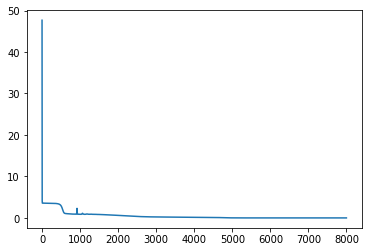

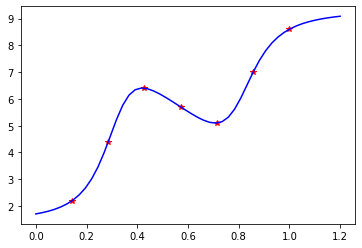

In [58]:
model = Sequential()  # 순차적으로 레이어층을 더해주는 모델
model.add(  Dense(5, activation='sigmoid')     )
model.add(  Dense(5, activation='sigmoid')     )
model.add(  Dense(5, activation='sigmoid')     )
model.add(  Dense(1)  ) 
mysgd = optimizers.SGD(learning_rate=0.1) # 확률적 경사하강법 # python code = weight[i] += - learning_rate * gradient
model.compile(loss='mse',  optimizer = mysgd)  # 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택
hist = model.fit(X, y, epochs=8000, verbose=0)
plt.plot(hist.history['loss'])
model.predict(X)
plt.show()
# y = np.array([[2.2], [4.4], [6.4], [5.7], [5.1], [7.0], [8.6]])


plt.plot(X[:,0], y[:,0], '*r')

test  = np.linspace(0,1.2, 50).reshape(-1,1) 
p = model.predict(test)
plt.plot(test[:,0], p[:,0], 'b')
plt.show()
# plt.plot(test[:,0], p1[:,0], 'b')
# plt.plot(test[:,0], p2[:,0], 'g')

---
---
# 로지스틱 회귀

array([[0.01345834],
       [0.02820176],
       [0.01561722],
       [0.02100629],
       [0.37275964],
       [0.7289474 ],
       [0.8512111 ],
       [0.9240698 ],
       [0.96281004]], dtype=float32)

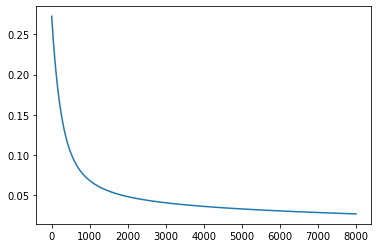

In [70]:

X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])

model = Sequential()  # 순차적으로 레이어층을 더해주는 모델
model.add(  Dense(1, activation='sigmoid')  ) 
mysgd = optimizers.SGD(learning_rate=0.1) # 확률적 경사하강법 # python code = weight[i] += - learning_rate * gradient
model.compile(loss='mse',  optimizer = mysgd)  # 모델을 기계가 이해할 수 있도록 컴파일 합니다. 오차 함수와 최적화 방법, 메트릭 함수를 선택
hist = model.fit(X, y, epochs=8000, verbose=0)
plt.plot(hist.history['loss'])
model.predict(X)

In [64]:
p =model.predict(X)
(p > 0.5)*1

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

---
---
# 📚 4. 이진 분류에서 loss 함수

In [72]:
p = 0.9 # sig(wx+b)
y = 1.0
print((p-y)**2)

p = 0.1 # sig(wx+b)
y = 1.0
print((p-y)**2)

0.009999999999999995
0.81


In [78]:
p = 0.000001 # (  sig(wx+b)  
y = 1.0

print((p - y)**2) # mse loss

0.9999980000009999


In [77]:
p = 0.0000001 # (  sig(wx+b)  
y = 1.0
-   (    y * np.log(p+1e-7) + (1-y)*np.log(1-p+1e-7)) # binary cross entropy - 해준이유 무조건 -값만나와서 양수로 바꿔준것임.

15.424948470398375

In [79]:
# binary cross entropy로 w(cost)값 구하기
p = np.array([0.1, 0.9, 0.2, 0.5]) # 예측값
y = np.array([0, 1, 1, 1]) # 이진 분류 값
cost = -  np.mean(    y * np.log(p+1e-7) + (1-y)*np.log(1-p+1e-7))  # binary  cross entropy
print(cost)

0.6283263005219083


In [80]:
X = np.array([0, 1, 0.2, 0.6, 5,      7,8,9,10]) / 10
y = np.array([0,0,0,0,0,    1,1,1,1])
#y = np.array([-2,-2,-2,-2,-2,    2,2,2,2])

model = Sequential() 
model.add(  Dense(1, activation='sigmoid')     ) 
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy',  optimizer = mysgd) 
model.fit(X, y, epochs=1000, verbose=0)
model.predict(X)
# 문제가 복잡할수록 binary_crossentropy가 더 굿굿

array([[0.05133322],
       [0.08667198],
       [0.05708855],
       [0.07045853],
       [0.4730392 ],
       [0.73410696],
       [0.8288239 ],
       [0.89464295],
       [0.93707526]], dtype=float32)

---
# 📚 5. softmax 정규화

In [81]:
p =  np.array([1.2, 2.4, 4.8])
n_p = p / np.sum(p)
print(n_p)

[0.14285714 0.28571429 0.57142857]


In [82]:
p =  np.exp(np.array([1.2, 2.4, 4.8]))
s_p = p / np.sum(p)
print(s_p)

[0.02443891 0.08114005 0.89442104]


In [83]:
p =  np.array([-3, 1.2, 2.4, 4.8])
n_p = p / np.sum(p)
print(n_p)

[-0.55555556  0.22222222  0.44444444  0.88888889]


In [84]:
p =  np.exp(np.array([-3, 1.2, 2.4, 4.8]))
s_p = p / np.sum(p)
print(s_p)

[3.66341331e-04 2.44299593e-02 8.11103213e-02 8.94093378e-01]


# 📚 6. 다중 클래스에서 loss


In [87]:
p = [0, 0, 0.999]
y = [1 , 0,   0]

# error?   에러는 크게


p = [0.999, 0,    0]
y = [1 ,     0,   0]

# error  ?  에러는 0에 가깝게

p = [0.7    0.2,    0.1]
y = [1 ,     0,      0]
# error  ?  에러는 0에 다소 큰 값






p = 0.9
y = 1.0


SyntaxError: ignored

In [88]:
p = np.array([0.009, 0.2,    0.1])
y = np.array([1 ,     0,   0])

-y * np.log(p+1e-6),   -np.sum(y * np.log(p+1e-6))     # cross entropy

(array([ 4.7104196, -0.       , -0.       ]), 4.710419596707189)

---
IRIS 데이터셋 분류

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
print(y)

y_e = np.eye(3)[y]
# print(y_e)


In [92]:
# np.eye(3)[[0,1,2,2,1,1,0]]
# np.argmax(np.eye(3)[[0,1,2,2,1,1,0]], axis=1)

array([0, 1, 2, 2, 1, 1, 0])

In [107]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))  # y = wx + b.. 출력값에 대해서 softmax적용. 3개의 확률값
model.add(Dense(5, activation='sigmoid')) # 출발점이 다르기때문에 도착점도 다르다?
model.add(Dense(3, activation='softmax'))
mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(X, y_e, epochs=2000, verbose=0)

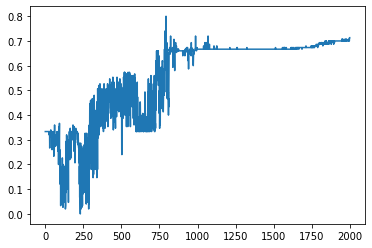

In [108]:
# plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

---
ohe 안쓰고 y로 하는법

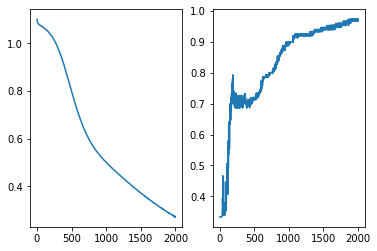

In [112]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값

#mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist =  model.fit(X, y, epochs=2000, verbose=0)

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

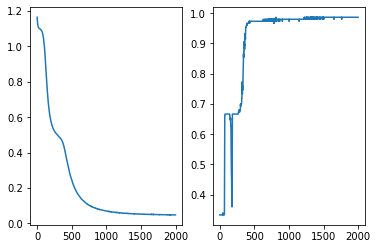

In [113]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(3, activation='softmax'))   # y = wx + b  3개의 확률값

#mysgd = optimizers.SGD(learning_rate=0.1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist =  model.fit(X, y, epochs=2000, verbose=0) # 데이터셋이 어느정도 있다면 optimizer = 'adam' 빠르게 답을 찾음. 

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])

---
예측

In [119]:
p = model.predict(X) # 출력값 3개중 확률값을 내놓음.
print(p.shape) # sample 150, 출력값3(sample 하나 당)

p = np.argmax(p, axis=1) # 다시 레이블로 
print(p)

print(p == y) 
np.mean(p==y) # 인식률 

model.evaluate(X,y) # loss, 인식률 이 코딩식 내부에 저 식이 존재하는구나 라고 이해. 

(150, 3)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  Tr

[0.048048388212919235, 0.9866666793823242]